In [1]:
#coding=utf-8
from keras.models import load_model
import pickle
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
with open('history_stepy.pickle', 'rb') as handle:
    his_my_stepy = pickle.load(handle)
    
with open('history_step.pickle', 'rb') as handle:
    his_step = pickle.load(handle)

In [3]:
def step_decay(epoch):
    lrate = 0.0005 * math.pow(0.9,  
           math.floor((1+epoch)/10))
    return lrate

def my_stepy_2(epoch):
    i = 0

    lrate = 0.0005 * math.pow(0.9,  
           math.floor((1+epoch)/10))
    while lrate < 10**-(6+i):
        lrate *= 100
        i  += 0.5
    return lrate

In [4]:
sdv = np.vectorize(step_decay)
sdv(range(10))


array([0.0005 , 0.0005 , 0.0005 , 0.0005 , 0.0005 , 0.0005 , 0.0005 ,
       0.0005 , 0.0005 , 0.00045])

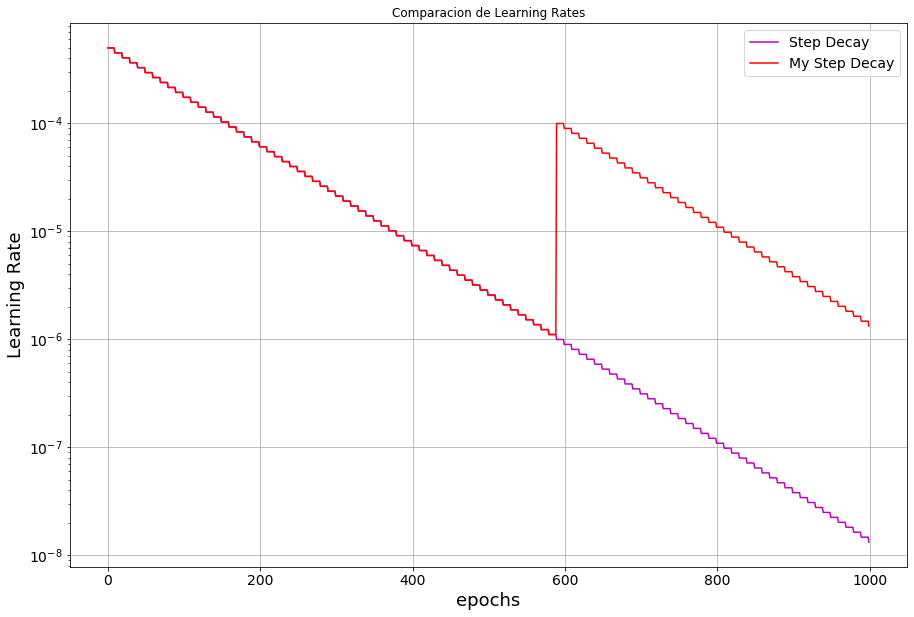

In [5]:
sdv = np.vectorize(step_decay)
msv = np.vectorize(my_stepy_2)

fig, ax, = plt.subplots(figsize=(15,10))

#ax.plot(history_clr.history['loss'], 'b', label = 'implied volatility')
ax.plot(range(1000), sdv(range(1000)),'m',label='Step Decay')
######################################################
ax.plot(range(1000), msv(range(1000)), 'r', label = 'My Step Decay')
#########################################################
#ax.plot(history_stepd.history['loss'], 'c', label = 'step decay')
ax.legend()
plt.legend(fontsize=14)
plt.title('Comparacion de Learning Rates')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("epochs", fontsize=18)
plt.ylabel("Learning Rate", fontsize=18)
plt.grid()
ax.set_yscale('log')

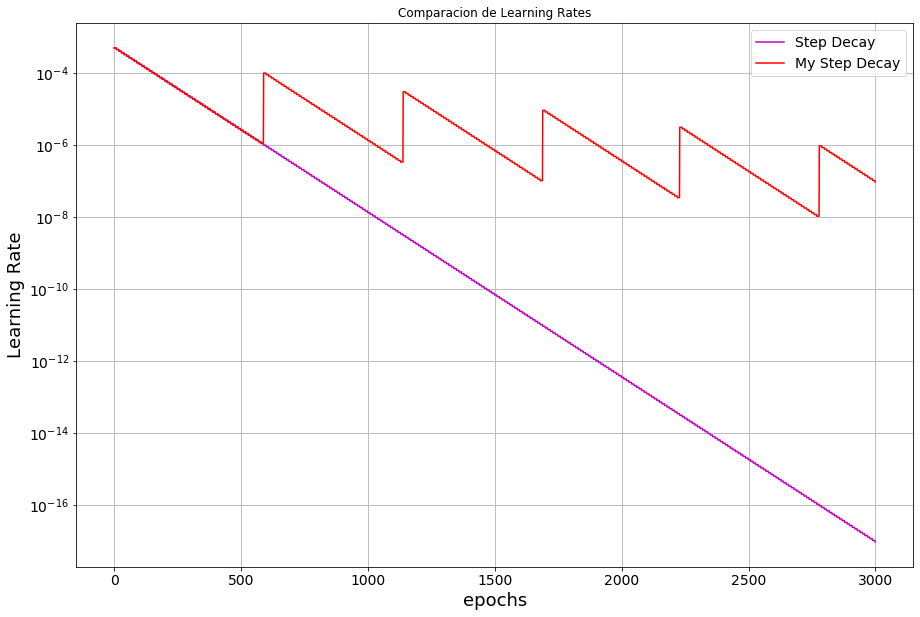

In [6]:
fig, ax, = plt.subplots(figsize=(15,10))

#ax.plot(history_clr.history['loss'], 'b', label = 'implied volatility')
ax.plot(range(3000), sdv(range(3000)),'m',label='Step Decay')
######################################################
ax.plot(range(3000), msv(range(3000)), 'r', label = 'My Step Decay')
#########################################################
#ax.plot(history_stepd.history['loss'], 'c', label = 'step decay')
ax.legend()
plt.legend(fontsize=14)
plt.title('Comparacion de Learning Rates')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("epochs", fontsize=18)
plt.ylabel("Learning Rate", fontsize=18)
plt.grid()
ax.set_yscale('log')

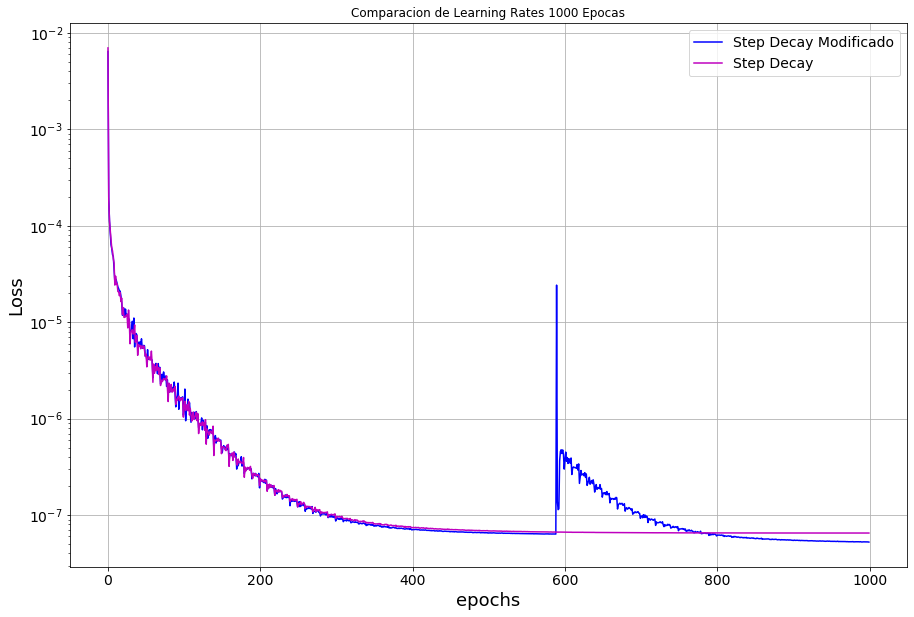

In [7]:
fig, ax, = plt.subplots(figsize=(15,10))

ax.plot(his_my_stepy.history['loss'], 'b', label = 'Step Decay Modificado')
ax.plot(his_step.history['loss'] ,'m',label='Step Decay')
######################################################

#########################################################

ax.legend()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Comparacion de Learning Rates 1000 Epocas')
plt.xlabel("epochs", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.grid()
ax.set_yscale('log')
plt.savefig('comparacion_step_1000',dpi=300, bbox_inches='tight')
#ax.set(xlabel='epoch', ylabel='loss',title='Comparación')